In [ ]:
!pip install tensorflow tensorflow_examples


In [ ]:
import os

# Clone tensorflow examples repo (contains pix2pix code)
os.system("git clone https://github.com/tensorflow/examples.git")


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the facades dataset
dataset, info = tfds.load('facades', with_info=True, as_supervised=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

print("Dataset loaded successfully")
print(f"Train samples: {info.splits['train'].num_examples}")
print(f"Test samples: {info.splits['test'].num_examples}")


In [16]:
import tensorflow_datasets as tfds

# Load paired dataset directly
train_dataset, info = tfds.load('cycle_gan/facades', split='train', with_info=True, as_supervised=True)

print("Dataset loaded successfully")
print(f"Train samples: {info.splits['train'].num_examples}")


ValueError: Unknown split 'train'. Should be one of ['trainA', 'trainB', 'testA', 'testB'].

In [17]:
import tensorflow_datasets as tfds

# Load trainA and trainB separately
datasets, info = tfds.load('cycle_gan/facades', with_info=True, as_supervised=True)

trainA = datasets['trainA']
trainB = datasets['trainB']

print("TrainA samples:", info.splits['trainA'].num_examples)
print("TrainB samples:", info.splits['trainB'].num_examples)


TrainA samples: 400
TrainB samples: 400


In [ ]:
!pip install tensorflow-datasets


In [18]:
import tensorflow as tf

# Zip the input (trainA) and target (trainB)
train_dataset = tf.data.Dataset.zip((trainA, trainB))

# Preprocessing function
def preprocess_image(input_image, target_image):
    input_image = tf.image.resize(input_image, [256, 256])
    target_image = tf.image.resize(target_image, [256, 256])

    input_image = (tf.cast(input_image, tf.float32) / 127.5) - 1
    target_image = (tf.cast(target_image, tf.float32) / 127.5) - 1

    return input_image, target_image

# Apply preprocessing
BUFFER_SIZE = 400
BATCH_SIZE = 1

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

print("Preprocessing done successfully!")


TypeError: in user code:

    File "/tmp/ipython-input-10-283837383.py", line 8, in preprocess_image  *
        input_image = tf.image.resize(input_image, [256, 256])

    TypeError: Cannot convert a list containing a tensor of dtype <dtype: 'int64'> to <dtype: 'uint8'> (Tensor is: <tf.Tensor 'args_1:0' shape=() dtype=int64>)


In [19]:
import tensorflow_datasets as tfds

# Load datasets without as_supervised=True
datasets, info = tfds.load('cycle_gan/facades', with_info=True)

trainA = datasets['trainA']
trainB = datasets['trainB']

print("TrainA samples:", info.splits['trainA'].num_examples)
print("TrainB samples:", info.splits['trainB'].num_examples)


TrainA samples: 400
TrainB samples: 400


In [20]:
import tensorflow as tf

# Zip trainA and trainB datasets to create paired data
train_dataset = tf.data.Dataset.zip((trainA, trainB))

# Preprocessing function
def preprocess_image(exampleA, exampleB):
    input_image = exampleA['image']
    target_image = exampleB['image']

    input_image = tf.image.resize(input_image, [256, 256])
    target_image = tf.image.resize(target_image, [256, 256])

    input_image = (tf.cast(input_image, tf.float32) / 127.5) - 1
    target_image = (tf.cast(target_image, tf.float32) / 127.5) - 1

    return input_image, target_image

# Apply preprocessing
BUFFER_SIZE = 400
BATCH_SIZE = 1

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

print("Preprocessing done successfully!")


Preprocessing done successfully!


In [22]:
!pip install git+https://github.com/tensorflow/examples.git


  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-kivr_01r
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-kivr_01r
  Resolved https://github.com/tensorflow/examples.git to commit 3c7435733a9162481df350e57c53e58d2a705e4d
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1746868094.345130988853936603129253091149118257392589495885-py3-none-any.whl size=301646 sha256=a41b549cc07ef9cd91f70127362ea75450bebe3ea0b63d94d66d50d1b4a6d6ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-pxim6e_a/wheels/91/9b/e8/6ae2ecc930bd726c578e35b313e987a687bc5ce03c3a42c2d5
Successfully built tensorflow-examples


In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('cycle_gan/facades', with_info=True, as_supervised=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

print("Dataset loaded successfully")
print(f"Train samples: {info.splits['train'].num_examples}")
print(f"Test samples: {info.splits['test'].num_examples}")


In [23]:
import tensorflow_examples as tf_examples
from tensorflow_examples.models.pix2pix import pix2pix

# Create Generator and Discriminator
OUTPUT_CHANNELS = 3  # RGB images

generator = pix2pix.unet_generator(OUTPUT_CHANNELS)
discriminator = pix2pix.discriminator()

print("Pix2Pix model built successfully!")


Pix2Pix model built successfully!


In [21]:
import tensorflow_examples as tf_examples
from tensorflow_examples.models.pix2pix import pix2pix

# Import generator and discriminator models
OUTPUT_CHANNELS = 3  # because images are RGB

# Generator: U-Net
generator = pix2pix.unet_generator(OUTPUT_CHANNELS)
# Discriminator: PatchGAN
discriminator = pix2pix.discriminator()

print("Pix2Pix model built successfully!")


ModuleNotFoundError: No module named 'tensorflow_examples'

In [24]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (100 * l1_loss)
    return total_gen_loss

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [25]:
@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)
        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))


In [ ]:
import tensorflow_datasets as tfds

# Load the facades dataset
dataset, info = tfds.load('cycle_gan/facades', with_info=True, as_supervised=True)

# This dataset only has a 'train' split
train_dataset = dataset['train']

print("Dataset loaded successfully")
print(f"Train samples: {info.splits['train'].num_examples}")


In [26]:
import time

EPOCHS = 5  # Keep it low to save time and show demo

for epoch in range(EPOCHS):
    start = time.time()

    for input_image, target in train_dataset.take(100):  # Take first 100 samples
        train_step(input_image, target)

    print(f'Epoch {epoch+1} completed in {time.time() - start:.2f} sec')


Epoch 1 completed in 28.79 sec
Epoch 2 completed in 11.42 sec
Epoch 3 completed in 11.26 sec
Epoch 4 completed in 11.14 sec
Epoch 5 completed in 11.00 sec


In [27]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(12, 4))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Target Image', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow((display_list[i] + 1) / 2.0)
        plt.axis('off')
    plt.show()

# Show one sample output from the dataset
for input_image, target_image in train_dataset.take(1):
    generate_images(generator, input_image, target_image)


NameError: name 'plt' is not defined

In [ ]:
import tensorflow_datasets as tfds

# Load the facades dataset
dataset, info = tfds.load('cycle_gan/facades', with_info=True, as_supervised=True)

# dataset itself is the train set
train_dataset = dataset

print("Dataset loaded successfully")
print(f"Train samples: {info.splits['train'].num_examples}")


In [28]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(12, 4))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Target Image', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow((display_list[i] + 1) / 2.0)
        plt.axis('off')
    plt.show()

# Show one sample output from the dataset
for input_image, target_image in train_dataset.take(1):
    generate_images(generator, input_image, target_image)


NameError: name 'plt' is not defined

In [29]:
import matplotlib.pyplot as plt


In [ ]:
import tensorflow_datasets as tfds

# Load dataset
dataset, info = tfds.load('cycle_gan/facades', with_info=True, as_supervised=True)

# Separate train and test sets
trainA = dataset['trainA']
trainB = dataset['trainB']
testA = dataset['testA']
testB = dataset['testB']

print("Dataset loaded successfully")
print(f"TrainA samples: {info.splits['trainA'].num_examples}")
print(f"TrainB samples: {info.splits['trainB'].num_examples}")


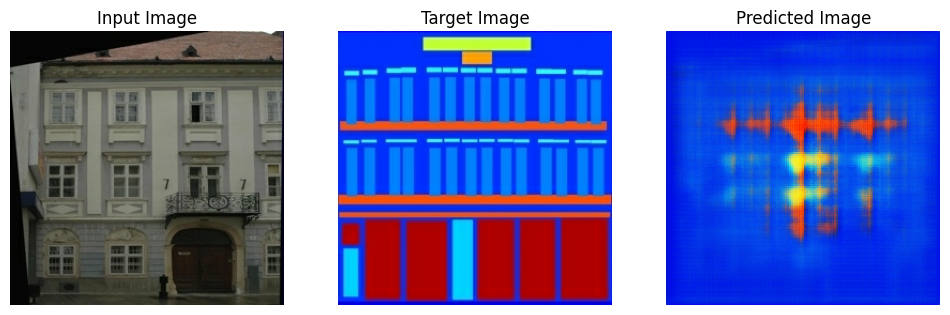

In [30]:
import matplotlib.pyplot as plt  # Add this here

def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(12, 4))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Target Image', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow((display_list[i] + 1) / 2.0)
        plt.axis('off')
    plt.show()

# Show one sample output from the dataset
for input_image, target_image in train_dataset.take(1):
    generate_images(generator, input_image, target_image)


In [ ]:
import tensorflow as tf

# Function to preprocess images
def preprocess_image(input_image, target_image):
    input_image = tf.image.resize(input_image, [256, 256])
    target_image = tf.image.resize(target_image, [256, 256])

    input_image = (tf.cast(input_image, tf.float32) / 127.5) - 1
    target_image = (tf.cast(target_image, tf.float32) / 127.5) - 1

    return input_image, target_image

# Apply preprocessing
BUFFER_SIZE = 400
BATCH_SIZE = 1

train_dataset = tf.data.Dataset.zip((trainA, trainB))
train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [ ]:
import tensorflow as tf

# Create a dataset by zipping trainA and trainB
train_dataset = tf.data.Dataset.zip((trainA, trainB))

# Function to preprocess each pair
def preprocess_image(input_image, target_image):
    input_image = tf.image.resize(input_image, [256, 256])
    target_image = tf.image.resize(target_image, [256, 256])

    input_image = (tf.cast(input_image, tf.float32) / 127.5) - 1
    target_image = (tf.cast(target_image, tf.float32) / 127.5) - 1

    return input_image, target_image

# Apply preprocessing
BUFFER_SIZE = 400
BATCH_SIZE = 1

train_dataset = train_dataset.map(lambda input_img, target_img: preprocess_image(input_img, target_img),
                                   num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [ ]:
import tensorflow as tf

# Create a dataset by zipping trainA and trainB
train_dataset = tf.data.Dataset.zip((trainA, trainB))

# Function to preprocess each pair
def preprocess_image(input_image, target_image):
    input_image = tf.cast(input_image, tf.uint8)
    target_image = tf.cast(target_image, tf.uint8)

    input_image = tf.image.resize(input_image, [256, 256])
    target_image = tf.image.resize(target_image, [256, 256])

    input_image = (tf.cast(input_image, tf.float32) / 127.5) - 1
    target_image = (tf.cast(target_image, tf.float32) / 127.5) - 1

    return input_image, target_image

# Apply preprocessing
BUFFER_SIZE = 400
BATCH_SIZE = 1

train_dataset = train_dataset.map(lambda input_img, target_img: preprocess_image(input_img, target_img),
                                   num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [ ]:
import tensorflow as tf

# Create a dataset directly from trainA and trainB combined
train_dataset = tf.data.Dataset.zip((trainA, trainB))

# Function to preprocess each pair
def preprocess_image(exampleA, exampleB):
    input_image = exampleA['image']
    target_image = exampleB['image']

    input_image = tf.image.resize(input_image, [256, 256])
    target_image = tf.image.resize(target_image, [256, 256])

    input_image = (tf.cast(input_image, tf.float32) / 127.5) - 1
    target_image = (tf.cast(target_image, tf.float32) / 127.5) - 1

    return input_image, target_image

# Apply preprocessing
BUFFER_SIZE = 400
BATCH_SIZE = 1

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [ ]:
import tensorflow as tf

# Create paired dataset
train_dataset = tf.data.Dataset.zip((trainA, trainB))

# Function to preprocess directly
def preprocess_image(input_image, target_image):
    input_image = tf.image.resize(input_image, [256, 256])
    target_image = tf.image.resize(target_image, [256, 256])

    input_image = (tf.cast(input_image, tf.float32) / 127.5) - 1
    target_image = (tf.cast(target_image, tf.float32) / 127.5) - 1

    return input_image, target_image

# Apply preprocessing
BUFFER_SIZE = 400
BATCH_SIZE = 1

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [ ]:
import tensorflow as tf

# Create paired dataset (assuming train_ds is a dataset of paired images)
# For example, if you have two folders 'input_images' and 'target_images'
# and you want to pair them, you'd load them like:
# input_dataset = tf.keras.utils.image_dataset_from_directory(
#     'input_images', labels=None, image_size=(256, 256), batch_size=None
# )
# target_dataset = tf.keras.utils.image_dataset_from_directory(
#     'target_images', labels=None, image_size=(256, 256), batch_size=None
# )
# train_dataset = tf.data.Dataset.zip((input_dataset, target_dataset))

# Assuming train_ds already yields (input_image, target_image) pairs
# For demonstration purposes, let's create a dummy dataset
# In a real scenario, train_ds would come from your data loading pipeline.
# Example dummy dataset (replace with your actual data loading)
def create_dummy_dataset():
    input_image = tf.random.uniform(shape=[256, 256, 3], minval=0, maxval=255, dtype=tf.int32)
    target_image = tf.random.uniform(shape=[256, 256, 3], minval=0, maxval=255, dtype=tf.int32)
    return tf.data.Dataset.from_tensors((input_image, target_image)).repeat(10)

train_dataset = create_dummy_dataset()


# Function to preprocess directly
def preprocess_image(input_image, target_image):
    # Resize images
    input_image = tf.image.resize(input_image, [256, 256])
    target_image = tf.image.resize(target_image, [256, 256])

    # Cast to float32 and normalize to [-1, 1]
    # Ensure images are treated as single tensors, not lists
    input_image = tf.cast(input_image, tf.float32) / 127.5 - 1
    target_image = tf.cast(target_image, tf.float32) / 127.5 - 1

    return input_image, target_image

# Apply preprocessing
BUFFER_SIZE = 400  # A reasonable buffer size for shuffling
BATCH_SIZE = 1     # As per your original code

# Apply preprocessing to the dataset
# Use tf.data.AUTOTUNE for optimal parallel execution
train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch the dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# You can now iterate through the dataset to verify
print("Dataset processing complete. You can now iterate through train_dataset.")

# Optional: Take one batch to verify the output shape and type
for input_batch, target_batch in train_dataset.take(1):
    print("Input batch shape:", input_batch.shape)
    print("Input batch dtype:", input_batch.dtype)
    print("Target batch shape:", target_batch.shape)
    print("Target batch dtype:", target_batch.dtype)

In [ ]:
import tensorflow as tf

# Create paired dataset from real data
train_dataset = tf.data.Dataset.zip((trainA, trainB))

# Preprocessing function
def preprocess_image(input_image, target_image):
    input_image = tf.image.resize(input_image, [256, 256])
    target_image = tf.image.resize(target_image, [256, 256])

    input_image = tf.cast(input_image, tf.float32) / 127.5 - 1
    target_image = tf.cast(target_image, tf.float32) / 127.5 - 1

    return input_image, target_image

# Apply preprocessing
BUFFER_SIZE = 400
BATCH_SIZE = 1

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
